<a href="https://colab.research.google.com/github/vijanth/Python/blob/master/SLRexercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The number of observation => 6
The parameters: 
B0 = 0.5110, 
B1 = 0.0030
SS Regression > 1 0.016051428571428574 0.016051428571428574 227.75675675675456
SS Error      > 4 0.0002819047619047647 7.047619047619117e-05
SS Total      > 5 0.01633333333333334
Coefficient of Determination -- >R2 =  0.982740524781341
Standard Error Estimate =  0.008395009855633951
T calculated value 15.091612 > T in table 2.776445
hence Ho is rejected, y depend on x
The confidence interval of B1 => [0.0024716.4 , 0.0035866.4]
F calculated Value 227.756757, >F in table 7.708647
hence Ho is rejected, y depend on x


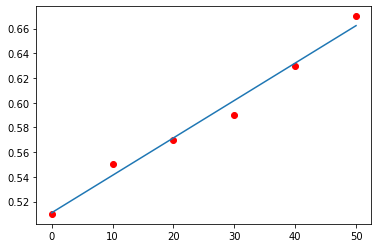

In [1]:
import numpy as nu #Vijanth - 13/6 Single Linear Regression using Python - Example 1
from matplotlib import pyplot as pll
from scipy.stats import t,f
x = nu.array([0,10,20,30,40,50])
y = nu.array([0.51, 0.55, 0.57, 0.59, 0.63, 0.67])
n = nu.size(x) # find number of obervation
xMean = nu.mean(x) # find mean of x
yMean = nu.mean(y)  # find the mean of y
B1 = nu.sum(nu.multiply(nu.subtract(x,xMean),nu.subtract(y,yMean)))/nu.sum(nu.power(nu.subtract(x,xMean),2))
B0 = yMean - B1*(xMean) # compute B0
yEst = B0 + nu.multiply(B1,x) # Y estimation for SLR
xlin = nu.linspace(nu.floor(min(x)),nu.ceil(max(x)),n) # sorted x is needed to plot YEst line
yEst1 =B0 + nu.multiply(B1,xlin) # Y estimate based on x sorted
print("The number of observation =>",n)
print("The parameters: \nB0 =% 6.4f, \nB1 =% 6.4f"%(B0, B1)) # display parameter
pll.plot(x,y, 'ro') # plot y - observed response
pll.plot(xlin,yEst1) # plot Y estimate based on 
SST = nu.sum(nu.power(nu.subtract(y,yMean),2)) # Anova section - finding SST
SSE = nu.sum(nu.power(nu.subtract(y,yEst),2)) # Anova section - finding SSE
SSR = SST - SSE
MSR = SSR/1
MSE = SSE/(n-2)
MST = SST/(n-1)
F = MSR/MSE # find F calculated value
print("SS Regression >" ,1, SSR, MSR, F)
print("SS Error      >", n-2, SSE, MSE)
print("SS Total      >",n-1, SST)
print("Coefficient of Determination -- >R2 = ", SSR/SST)
print("Standard Error Estimate = ", nu.sqrt(MSE))
alph = 0.05  # level of significance
SeB1 = nu.sqrt((MSE)/(nu.sum(nu.power(nu.subtract(x,xMean),2))))
Tcal = B1/SeB1 # Tcal assume B1-population is zero for Ho
Tregion = t.ppf((1-alph/2),n-2)
if nu.absolute(Tcal) > Tregion:
  print("T calculated value %f > T in table %f\nhence Ho is rejected, y depend on x"%(Tcal,Tregion))
  print("The confidence interval of B1 => [%f6.4 , %f6.4]"%(B1-Tregion*SeB1, B1+Tregion*SeB1))
else:
  print("Failed to reject Ho, there is No dependencis between y and x")
Fregion = f.ppf((1-alph),1,n-2) # F - Test
if F > Fregion:
   print("F calculated Value %f, >F in table %f\nhence Ho is rejected, y depend on x"%(F,Fregion))
else:
   print("Failed to reject Ho, there is No dependencies between y and x")   